<a href="https://colab.research.google.com/github/darshnkd/deep-learning-with-tensorflow/blob/main/Neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Neural Network Classification**

Introduction to neural network classification with tensorflow

In this notebook we're going to learn neural network classification problem.

A classification is where you try to classify something as one thing or another.

A few types of classfication problems.
* Binary classification
* Multiclass classification
* Multilabels classification

### Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# make 1000 example
n_samples = 1000

# create circles
x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
# check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check the lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

#### Our data is a little hard to understand right now ...let's visualize it.

In [ ]:
import pandas as pd
circles = pd.DataFrame({"x0":x[:,0], "x1":x[:,1],"label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


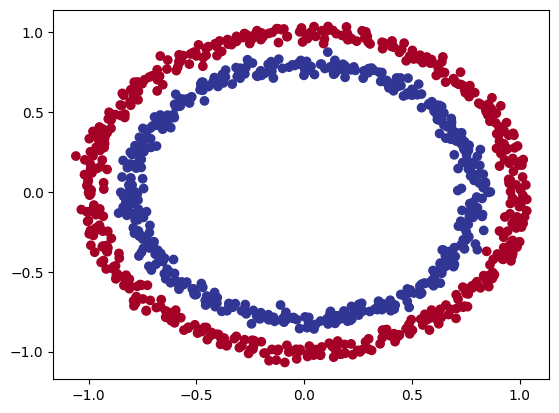

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y, cmap=plt.cm.RdYlBu);

#### Input and output shapes

In [ ]:
# Check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(x), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and lables
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

#### Steps in modelling

1. Create or import model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [ ]:
# Set the random seed
import tensorflow as tf
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

# 2. compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]

)
# 3. Fit the model
model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4549 - loss: 6.0322
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4528 - loss: 4.6300
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4605 - loss: 3.5137 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4710 - loss: 0.7934 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4664 - loss: 0.7281 


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(x,y,epochs=200, verbose=0)
model_1.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on binary classification problem  and our model is gettiong around - 50% accuracy..it's performing as if it's guessing.

So let's add an extra layer

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. fit the model
model_2.fit(x,y,epochs=100,verbose=0)

In [ ]:
# Evaluate
model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 0.6932  


[0.6932140588760376, 0.5]

In [ ]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

#### Improving our model

1. create model - increase layer,add more hidden units and change activation function.
2. compile model - here we can change optimizer SGD to Adam.
3. fit model - we might fit our model for more epochs(leave it training for longer)

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01),
    metrics=["accuracy"]
)

# 3. fit the model
model_3.fit(x,y,epochs=100,verbose=0)

In [ ]:
# evaluate it
model_3.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9960 - loss: 0.0205  


[0.02560596913099289, 0.9909999966621399]

In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (32.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

To visualize our model's predictions,let's create a function `plot_decision_boundry(),this function will:

* take in trained model,feature(x) and label(y)
* create a meshgrid of the different x value
* make prediction across the meshgrid
* plot the predictions as well as a line between zone (each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


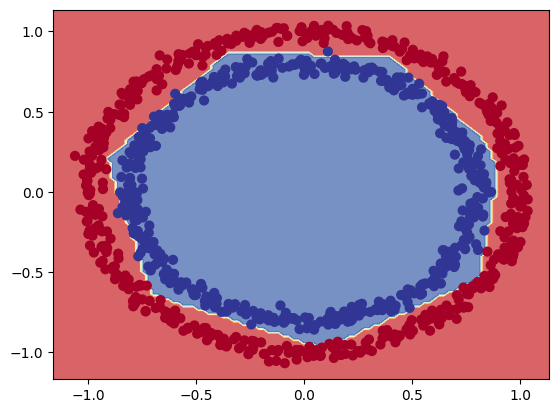

In [ ]:
plot_decision_boundary(model=model_3,
                       X=x,
                       y=y)

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming model is your trained model
# X_test and y_test are your test data and true labels

# Make predictions
y_pred = model_3.predict(x)
# If it's a binary classification, round the predictions
y_pred = np.round(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 99.10%


Remember that classification not works for the regression problem.

### The missing piece : Non -linearity

🔑 **Note:** The combination of **liner(straight lines) and non-linear(non-straight lines) functions** is one of the key fundamentals of neural networks.

Let's see them in action.

In [ ]:
# create a toy tensor (similar to data we pass in to our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

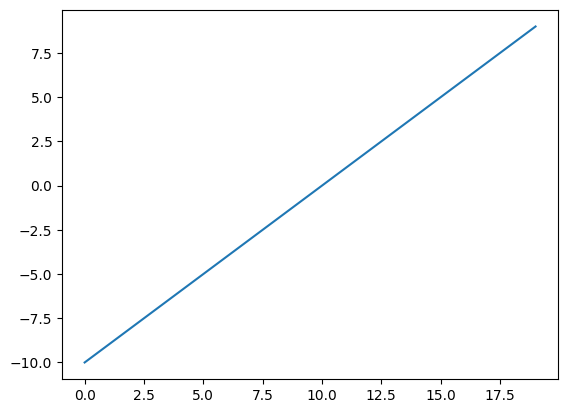

In [ ]:
# visualize our toy tensor
plt.plot(A)

In [ ]:
# let's start replicating sigmoid function - sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

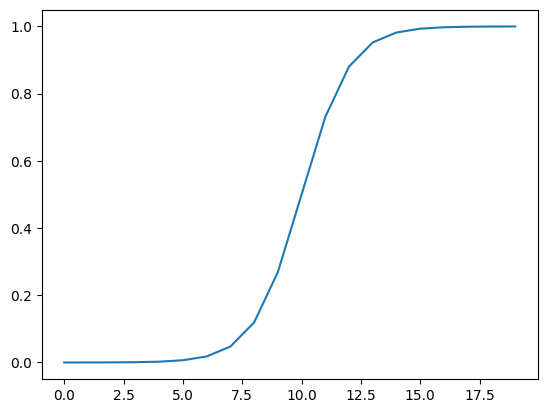

In [ ]:
# plot the transformed sigmoid of A
plt.plot(sigmoid(A))

In [ ]:
# let's recreate relu function
def relu(x):
  return tf.maximum(0,x)

# pass our toy tensor to relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

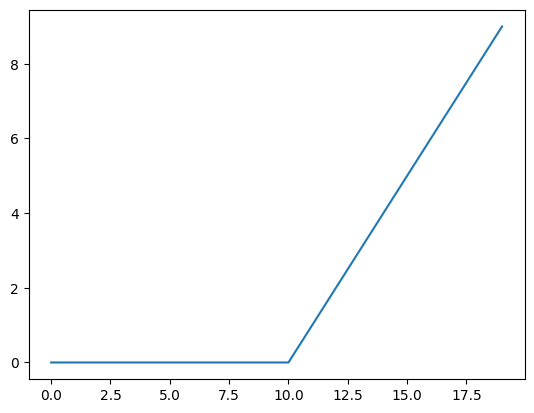

In [ ]:
# plot the relu function
plt.plot(relu(A))

In [ ]:
# lets try linear activation
def linear(x):
  return x

# pass our toy tensor linear function
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

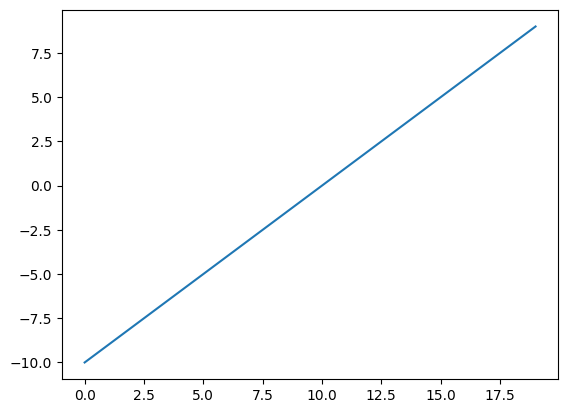

In [ ]:
plt.plot(linear(A))

In [ ]:
# softmax activation function
def softmax(x):
  return tf.exp(x) / tf.reduce_sum(tf.exp(x))

# pass our toy tensor to softmax function
softmax(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([3.5416430e-09, 9.6271835e-09, 2.6169397e-08, 7.1135801e-08,
       1.9336716e-07, 5.2562643e-07, 1.4288007e-06, 3.8838834e-06,
       1.0557488e-05, 2.8698230e-05, 7.8009878e-05, 2.1205282e-04,
       5.7641935e-04, 1.5668703e-03, 4.2591947e-03, 1.1577693e-02,
       3.1471431e-02, 8.5548222e-02, 2.3254417e-01, 6.3212061e-01],
      dtype=float32)>

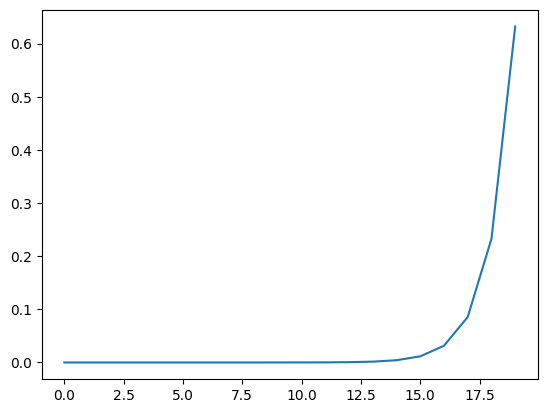

In [ ]:
plt.plot(softmax(A))

### Evaluting and improving our classification
so far we've been training and testing our model on the same data.

however, in machine learning this is sin.

So let's create a training and test set.

In [ ]:
# Check how many example we have
len(x)

1000

In [ ]:
# split in to train and test split
x_train,y_train = x[:800],y[:800]
x_test,y_test = x[800:],y[800:]

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# create the random seed
tf.random.set_seed(42)

# 1. create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy,
optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
metrics=["accuracy"])

# 3. fit the model
history = model_4.fit(x_train,y_train,epochs= 50)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5541 - loss: 0.6922
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5635 - loss: 0.6781 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5958 - loss: 0.6633 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.6337  
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7545 - loss: 0.5983 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.5478 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8554 - loss: 0.4885  
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8798 - loss: 0.4291 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9135 - loss: 0.3700  
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9522 - loss: 0.3175 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9607 - loss: 0.2726  
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [ ]:

# Evaluate the model on test dataset
model_4.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9882 - loss: 0.0536  


[0.05501396581530571, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


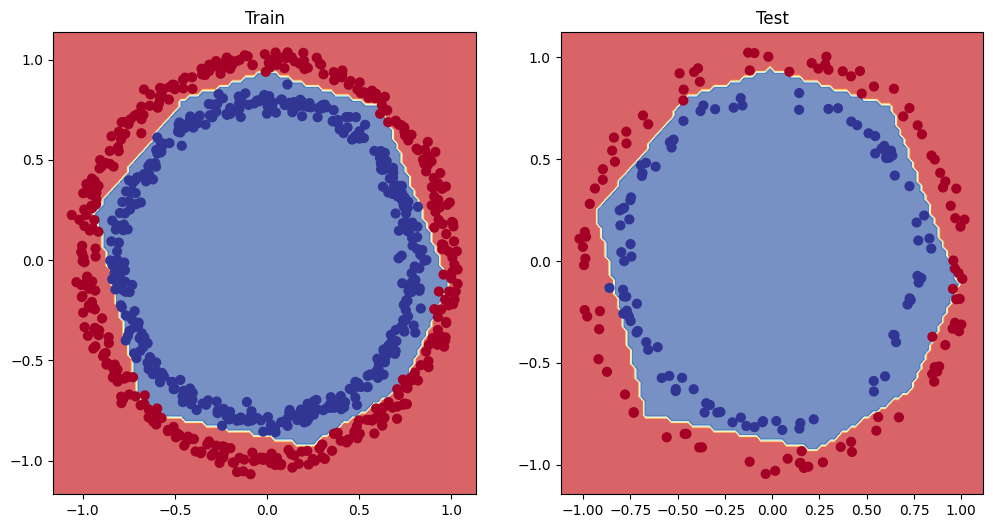

In [ ]:
# plot decision boundries for training and test data set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,
                       X=x_train,
                       y=y_train,)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,
                        X=x_test,
                        y=y_test)
plt.show();


#### plot the loss (or training) curve

In [ ]:
# see in dataframe
pd.DataFrame(history.history)

,accuracy,loss
0,0.58250,0.683495
1,0.58625,0.672247
2,0.62500,0.654839
3,0.75750,0.623450
4,0.78375,0.582787
5,0.83250,0.528186
6,0.86375,0.468381
7,0.89500,0.409650
8,0.92125,0.353092
9,0.94875,0.303442


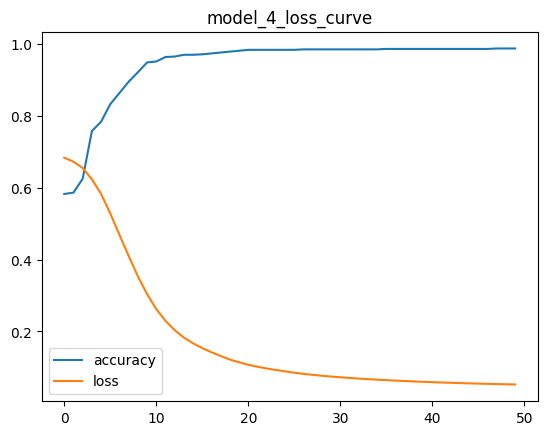

In [ ]:
# plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("model_4_loss_curve")
plt.show()



🔑 **NOTE:** For many problems, the loss function going down means the model is improving (the preddiction it's making are gettiing closer to the ground truth labels).

### Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decrease the most during training ) we're going to use the following steps:
* A leraning rate **callback** - you can think of a callback as an extra piece of functionalit, *while* it's training.
* Another model (we could use the same on as above but we're practicing building model here)
* A modified loss curves plot.

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_5.compile(loss="BinaryCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history_5 = model_5.fit(x_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5034 - loss: 0.6974 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5114 - loss: 0.6970 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5141 - loss: 0.6966 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5109 - loss: 0.6962 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5118 - loss: 0.6958 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5105 - loss: 0.6953 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5082 - loss: 0.6948 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5085 - loss: 0.6943 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5099 - loss: 0.6938 - learning_

<Axes: xlabel='epochs'>

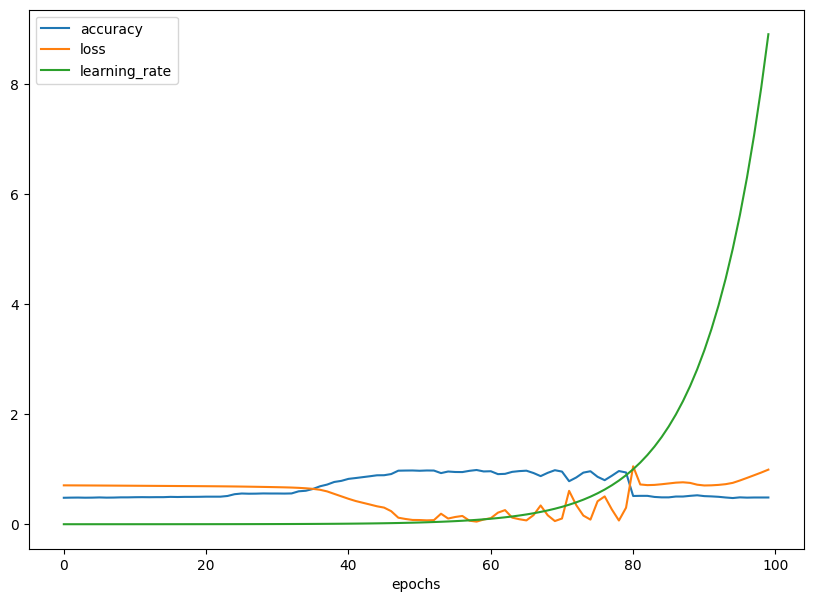

In [ ]:
# Check out the history
pd.DataFrame(history_5.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

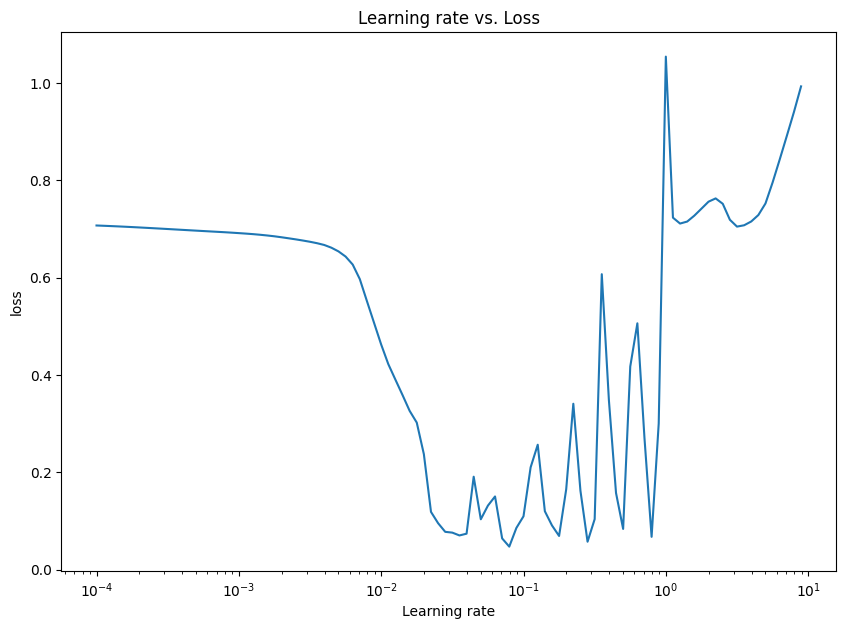

In [ ]:
# plot leraning rate versus the loss
lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_5.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs. Loss")


In [ ]:
lrs.shape

TensorShape([100])

In [ ]:
# Example of others typical learning rate
10*0 , 10**-1 ,10**-2 ,10**-3 , 1e-4

(0, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# let's try using s higher *ideal* learnin g rate with the same model

# set the random seed
tf.random.set_seed(42)

# create a model
model_6 = tf.keras.Sequential([
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_6.compile(loss="BinaryCrossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# fit the model
history_6 = model_6.fit(x_train,y_train,epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5154 - loss: 0.6916
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5028 - loss: 0.6910
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5154 - loss: 0.6869
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6028 - loss: 0.6821
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6133 - loss: 0.6722
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6245 - loss: 0.6450
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6901 - loss: 0.5839
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7683 - loss: 0.4970
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8516 - loss: 0.4146
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8808 - loss: 0.3485
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8990 - loss: 0.2980
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9277 - lo

In [ ]:
# evaluate model 6 on the test data
model_6.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9683 - loss: 0.1119  


[0.10968034714460373, 0.9649999737739563]

In [ ]:
model_4.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.0536 


[0.05501396581530571, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


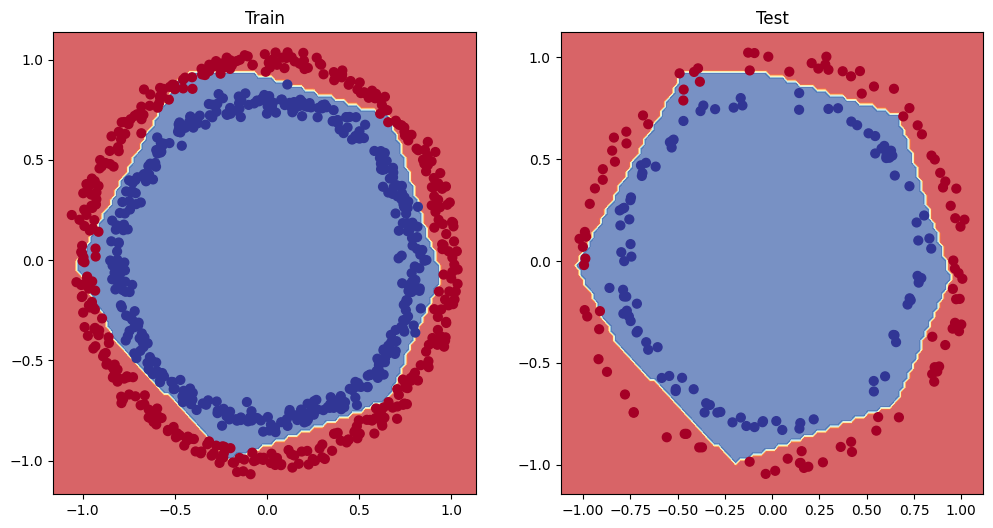

In [ ]:
# plot the decision boundries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6,X=x_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6,X=x_test,y=y_test)
plt.show()

### More classification evaluation methods

Alongside visualizing our models result as much as possible, there are a handful of other classification evaluation methods.
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report scikit-learn


In [ ]:
# Check the accuracy of the model
loss,accuracy = model_6.evaluate(x_test,y_test)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy on the test set : {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9683 - loss: 0.1119 
Model loss on the test set : 0.10968034714460373
Model accuracy on the test set : 96.50%


#### Confusion matrix

**ValueError: Classification metrics can't handle a mix of binary and continuous targets**

you'll get this error, you need to convert. cause y_test is in binary form.


In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_pred[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# make prediction
y_pred = model_6.predict(x_test)

# create confusion matrix
confusion_matrix(y_test,tf.round(y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[94,  7],
       [ 0, 99]])

#### How about we pretify ou confusion matrix

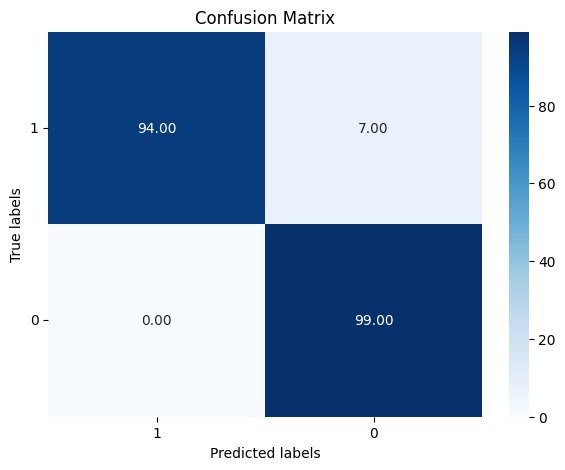

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the confusion matrix
confusion_matrix = confusion_matrix(y_test,tf.round(y_pred))

# normalization of confusion matrix
cm_sum = confusion_matrix.sum()
normalized_cm = confusion_matrix / cm_sum

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)

# Add labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Add ticks
plt.xticks([0.5, 1.5], ['1', '0'], rotation=0)
plt.yticks([0.5, 1.5], ['1', '0'], rotation=0)

plt.show()

In [ ]:
fun = lambda first_name,last_name:f"Hello {first_name} {last_name}"
print(fun("Darshan","Dhanwade"))

Hello Darshan Dhanwade


### Working with a larger example(multiclass classification)

when you have more than two classes as an option,it's known as **multiclass classification**.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

We are taking here tensorflow built in dataset (**fashion mnist**)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has alredy been sorted in to training and test sets for us
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [ ]:
# check the shape of single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

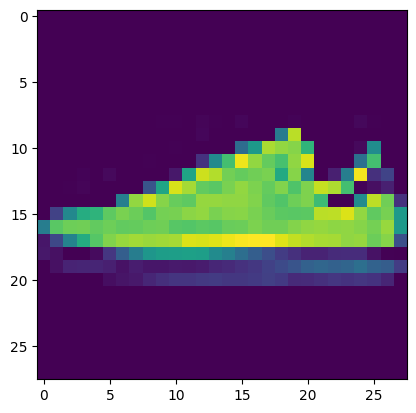

In [ ]:
# plot the single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[6])

In [ ]:
# check out sample label
train_labels[6]

7

In [ ]:
# Create a small list so we can index our training labels so they're human readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

In [ ]:
#from IPython import get_ipython
#get_ipython().kernel.do_shutdown(restart=True)

{'status': 'ok', 'restart': True}

Text(0.5, 1.0, 'T-shirt/top')

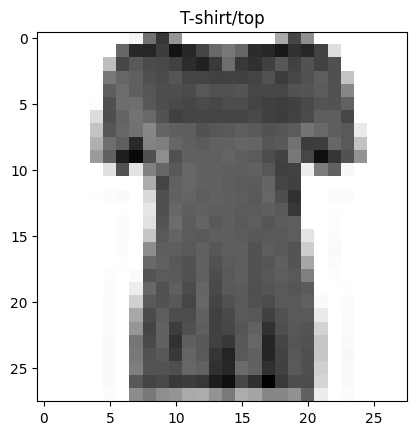

In [ ]:
#plot an examplen image and it's label
import matplotlib.pyplot as plt # Make sure to import matplotlib

index_of_choice = 10
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

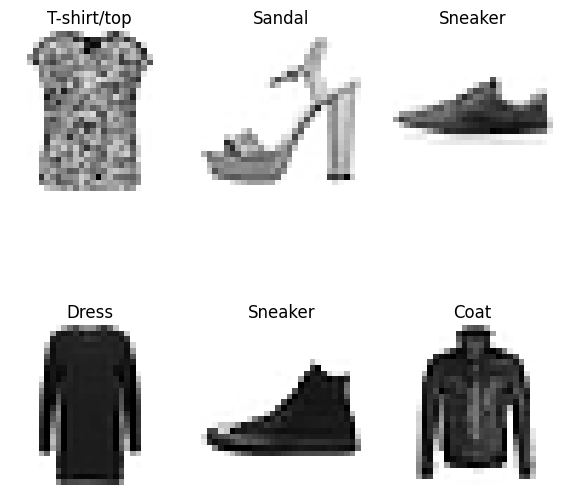

In [ ]:
# plot the multiple random images of fashion MNIST
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(7,7))
for i in range(6):
  random_index = random.choice(range(len(train_data)))
  plt.subplot(2,3,i+1)
  plt.imshow(train_data[random_index],cmap=plt.cm.binary)
  plt.title( class_names[train_labels[random_index]])
  plt.axis("off")
plt.show()

## Building a multi-class classification

For our multi-class classification model, we can use a similar architecture to our binary classifiers,however, we're going to have to tweak a few things:
* Input shape = 28 * 28 (the shape of one image)
* Output shape = 10 (one per class of clothing )
* Loss function = tf.keras.lossses.CategoricalCrossentropy()
* Output layer activation=Softmax(not sigmoid)
* If yours labels are onr-hot encoded, use CategoricalCrossentropy()
* If yours labels are integer for use SparseCategoricalCrossentropy()

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
import keras
from keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
    ])

# 2. compile the model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. fit the model
non_norm_history = model_7.fit(train_data,train_labels,
                               epochs=10,
                               validation_data=(test_data,test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1800 - loss: 2.0837 - val_accuracy: 0.2557 - val_loss: 1.7490
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2662 - loss: 1.7339 - val_accuracy: 0.2701 - val_loss: 1.6610
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2751 - loss: 1.6589 - val_accuracy: 0.2771 - val_loss: 1.6463
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2752 - loss: 1.6444 - val_accuracy: 0.2724 - val_loss: 1.6216
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2764 - loss: 1.6304 - val_accuracy: 0.2775 - val_loss: 1.6247
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2793 - loss: 1.6096 - val_accuracy: 0.2780 - val_loss: 1.6271
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2798 - loss: 1.6165 - val_accuracy: 0.2947 - val_loss: 1.6010
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2834 - loss: 1.6000 - 

In [ ]:
model_7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
# check the min and max values of the training data
train_data.min(),train_data.max()

(0, 255)

Neural network prefer data to be scaled (or normlized ), this means they like to have the numbers in the tensor they try to find the patterns between 0 & 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data /255.0
test_data_norm = test_data /255.0

# check the min and max of scaledtraining data
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normlized , let's build a model to find the patterns in it

# set random seed
tf.random.set_seed(42)

# 1. create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# 2. compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. fit the model
norm_history = model_8.fit(train_data_norm,train_labels,
                           epochs = 10,
                           validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4347 - loss: 1.5173 - val_accuracy: 0.7554 - val_loss: 0.7167
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7706 - loss: 0.6680 - val_accuracy: 0.7862 - val_loss: 0.6225
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7919 - loss: 0.5940 - val_accuracy: 0.7919 - val_loss: 0.5913
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7993 - loss: 0.5656 - val_accuracy: 0.7964 - val_loss: 0.5740
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8034 - loss: 0.5488 - val_accuracy: 0.7982 - val_loss: 0.5634
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8090 - loss: 0.5346 - val_accuracy: 0.8010 - val_loss: 0.5591
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8119 - loss: 0.5245 - val_accuracy: 0.8015 - val_loss: 0.5545
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8144 - loss: 0.5175 - 

**How cool is this just normlizing (converting between 0 & 1) our data model's  accuracy shoot's up from 45 to 81.**

<Axes: title={'center': 'Normlized data'}>

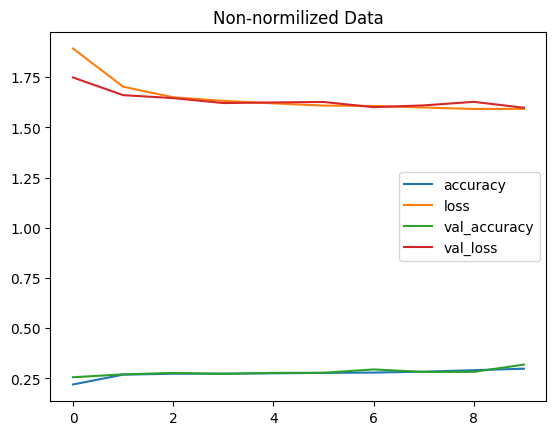

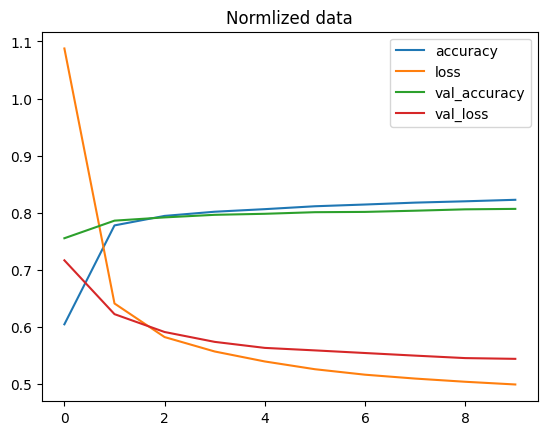

In [ ]:
import pandas as pd

# plot non-normlized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normilized Data")

# plot normlized data loss curve
pd.DataFrame(norm_history.history).plot(title="Normlized data")

>🔑**NOTE:** The same model with *slightly* different data can produce *dramatically* different results. So when comparing models, it's important to make sure you're comparing them on the smae criteria (e.g. same architecture but different data or same data but different architecture).

### Finding ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. compile the model
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create learning rate collback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 3. Fit the model
find_lr_history = model_9.fit(train_data_norm,train_labels,
epochs=20,
                         validation_data=(test_data_norm,test_labels),
                         callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3905 - loss: 1.6016 - val_accuracy: 0.7773 - val_loss: 0.6250 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7902 - loss: 0.5982 - val_accuracy: 0.8036 - val_loss: 0.5708 - learning_rate: 0.0011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8066 - loss: 0.5535 - val_accuracy: 0.8105 - val_loss: 0.5501 - learning_rate: 0.0013
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8126 - loss: 0.5340 - val_accuracy: 0.8134 - val_loss: 0.5383 - learning_rate: 0.0014
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8161 - loss: 0.5225 - val_accuracy: 0.8152 - val_loss: 0.5322 - learning_rate: 0.0016
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8192 - loss: 0.5156 - val_accuracy: 0.8180 - val_loss: 0.5285 - learning_rate: 0.0018
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8202 - 

Text(0.5, 1.0, 'Finding the ideal learning rate')

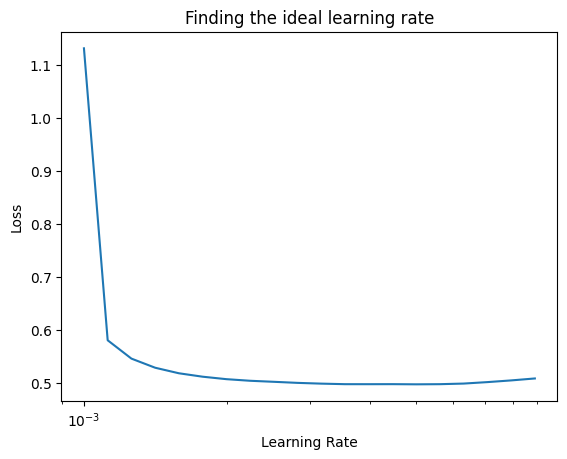

In [ ]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(20)/20))
plt.semilogx(lrs , find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
10**-2

0.01

In [ ]:
# Fitting the model with ideal learning rate

# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
])

# 2. compile the model
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])

# 3. fit the model
ideal_lr_history = model_10.fit(train_data_norm,train_labels,
                                epochs=20,
                                validation_data=(test_data_norm,test_labels))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5027 - loss: 1.2904 - val_accuracy: 0.7055 - val_loss: 0.7795
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7235 - loss: 0.7369 - val_accuracy: 0.7462 - val_loss: 0.7095
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7569 - loss: 0.6711 - val_accuracy: 0.7647 - val_loss: 0.6710
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7768 - loss: 0.6318 - val_accuracy: 0.7763 - val_loss: 0.6444
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7901 - loss: 0.6069 - val_accuracy: 0.7825 - val_loss: 0.6268
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7967 - loss: 0.5909 - val_accuracy: 0.7848 - val_loss: 0.6173
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8003 - loss: 0.5800 - val_accuracy: 0.7874 - val_loss: 0.6125
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8026 - loss: 0.5722 - 

## Evaluating our multi-class classifiaction model

To evaluate our multiclass classification model we could:
* Evaluate it's performance using other classification matrics (such as confusion matrix)
* Assess some of it's prediction (through visualizations)
* Improve it's result by (training for longer or changing it's architecture )
* Save and export it for use in an application


Let's go through the top 2 ..

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(14,10), text_size=10):

    # Define the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix by row (i.e by the number of samples in each class)
    cm_sum = cm.sum(axis=1, keepdims=True)
    normalized_cm = cm.astype('float') / cm_sum

    # Combine the counts and the normalized values in one label
    labels = np.asarray([f'{int(cm[i,j])}\n{normalized_cm[i,j]*100:.1f}%' for i in range(cm.shape[0]) for j in range(cm.shape[1])]).reshape(cm.shape)


    # Create a heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(normalized_cm, annot=labels,  fmt='',cmap="Blues", cbar=True, xticklabels=classes, yticklabels=classes)

    # Add labels
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

    # Adjust text size
    plt.xticks(fontsize=text_size)
    plt.yticks(fontsize=text_size)

    plt.show()

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# make some prediction with our model
y_probs = model_10.predict(test_data_norm) # probs is short for prediction probabilities

# view the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.66154762e-14, 0.00000000e+00, 7.85921267e-16, 3.14780971e-19,
        1.02983443e-25, 2.71878004e-01, 7.53279106e-11, 8.20075870e-02,
        1.78750852e-05, 6.46096587e-01],
       [1.40384603e-02, 1.90118935e-05, 8.72586071e-01, 2.15654564e-03,
        8.43469519e-03, 1.51071316e-02, 8.49818885e-02, 5.70604403e-04,
        3.17835336e-04, 1.78748800e-03],
       [4.41110330e-07, 9.98359561e-01, 2.99508501e-10, 1.46043662e-03,
        1.79379713e-04, 9.48464859e-22, 2.04665014e-07, 6.15459658e-28,
        1.02082298e-08, 2.97581274e-23],
       [5.20243930e-07, 9.97760773e-01, 5.26896651e-11, 2.20576115e-03,
        3.28848655e-05, 5.70440230e-24, 7.01948295e-08, 2.86184044e-31,
        1.62677194e-09, 5.29060068e-25],
       [1.48365334e-01, 7.07509059e-07, 2.53921986e-01, 1.35402577e-02,
        1.70685053e-02, 1.31388952e-04, 5.59546530e-01, 7.07986203e-09,
        7.40628270e-03, 1.89930706e-05]], dtype=float32)

In [ ]:
y_probs[0] , tf.argmax(y_probs[0]) , class_names[tf.argmax(y_probs[0])]

(array([1.66154762e-14, 0.00000000e+00, 7.85921267e-16, 3.14780971e-19,
        1.02983443e-25, 2.71878004e-01, 7.53279106e-11, 8.20075870e-02,
        1.78750852e-05, 6.46096587e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# convert all of the predictions probabilities in to integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
y_preds

array([9, 2, 1, ..., 8, 1, 5])

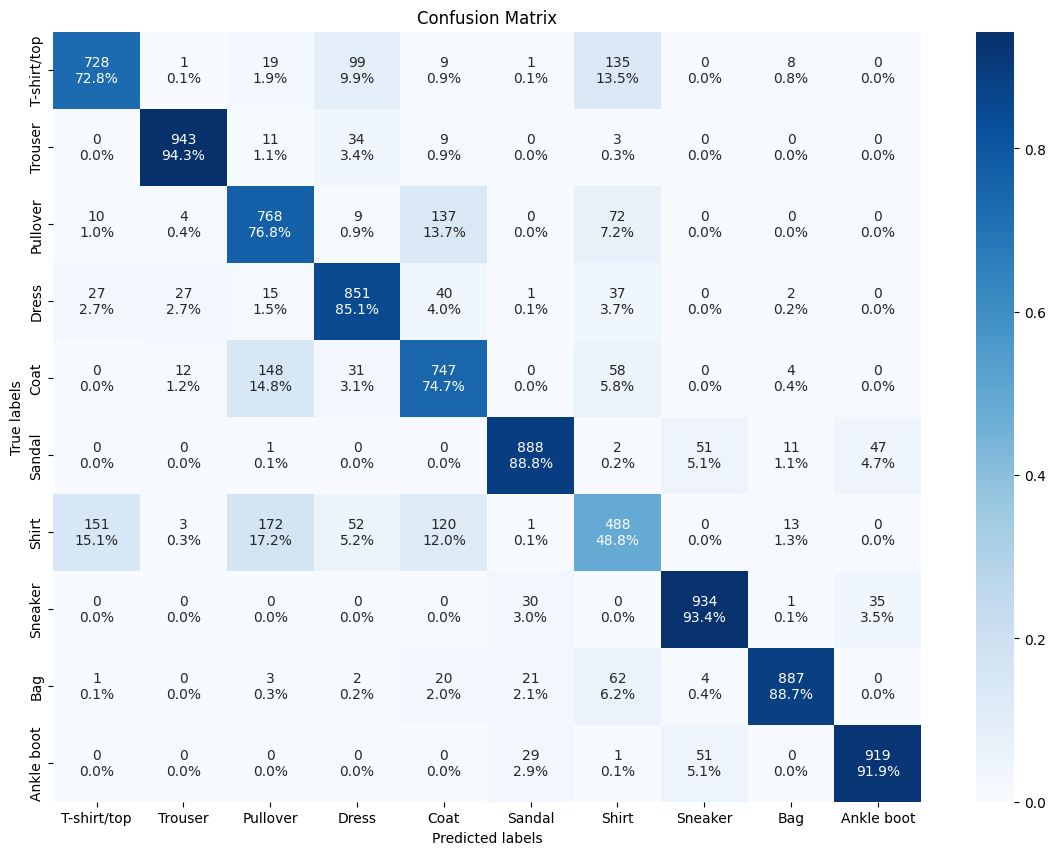

In [ ]:
# Make confusion matrix
from sklearn.metrics import confusion_matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(14,10),
                      text_size=10)

🔑 **NOTE**: Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develope a further understanding of the data and the inputs and outputs of your models.

Can create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model,images,true_labels,classes):
  '''
  picks a random image, plots it and labels it with a prediction and truth label.
  '''
  # set up random integer
  i = random.randint(0,len(images))

  # create prediction and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image ,cmap = plt.cm.binary)

  # change the color of title depending upon the if prediction is right or not
  if pred_label == true_label:
    color="green"
  else:
    color="red"

  # Add x-label information (prediction/true label)
  plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})", color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


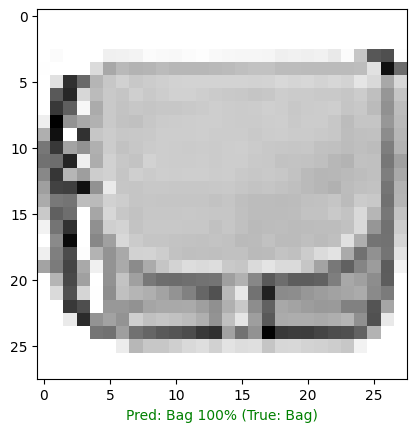

In [ ]:
plot_random_image(model_10,test_data_norm,test_labels,class_names)

### What patterns is our model learning?

In [ ]:
# find the layers of our model
model_10.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [ ]:
# Extract a particular layer
model_10.layers[2]

<Dense name=dense_10, built=True>

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_10.layers[1].get_weights()


# shapes
weights, weights.shape

(array([[-0.90317905, -0.5679467 ,  0.8683505 ,  0.72294074],
        [-0.15980503,  0.0381398 ,  0.19614   ,  0.7778325 ],
        [-1.3266058 , -0.8960164 ,  1.0041163 ,  0.42350534],
        ...,
        [-0.5760019 ,  0.75089055, -0.72920483, -0.09360043],
        [-0.39963302,  0.0697771 , -0.39143932, -0.25798836],
        [-0.5817019 ,  0.23940694,  0.67985255,  0.451266  ]],
       dtype=float32),
 (784, 4))

In [ ]:
28 * 28

784

In [ ]:
model_10.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.6224818 ,  0.48995966, -0.13063289,  0.42664647], dtype=float32),
 (4,))

Every neuron has a bias vector.Each of these is paired with a weights matrix.

The bias vectior get initilized as zeros (at least in the case of TensorFlow Dense layer).

The bias vectoer dictates how much the patterns within the corrrosponding weights metrix should influence the next layer.

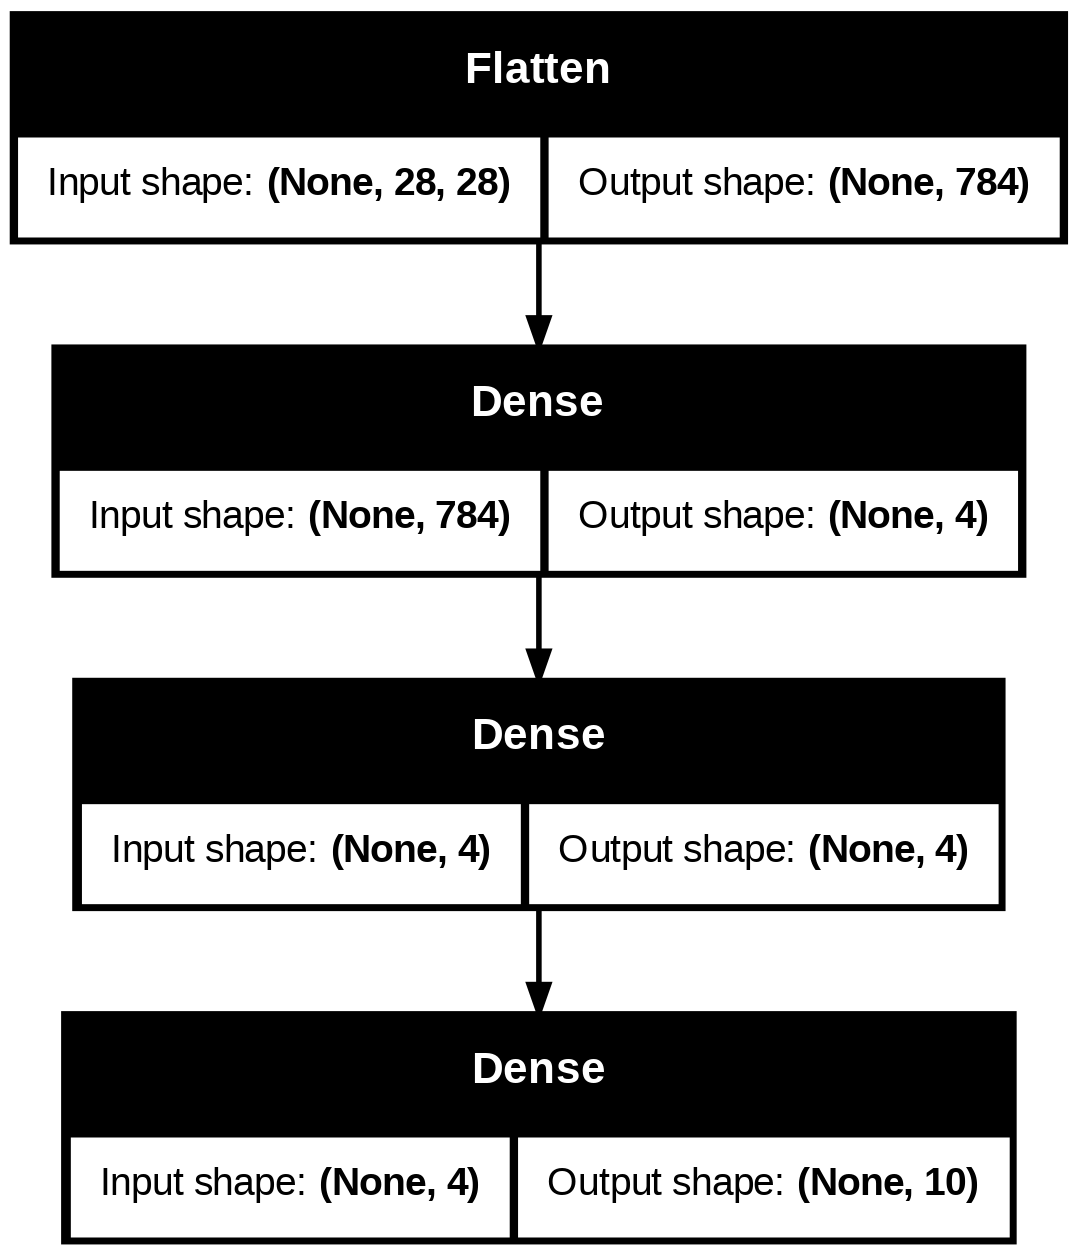

In [ ]:
# Let's check out another way to viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inouts and outputs of each layer
figure = figsize=(7,7)
plot_model(model_10,show_shapes=True)